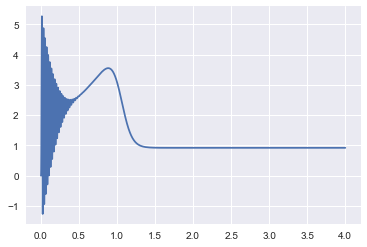

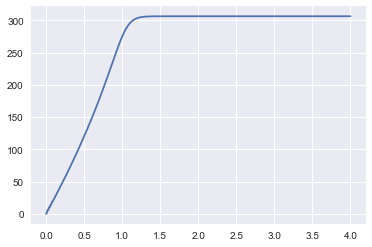

[0, 1, -50, 50]

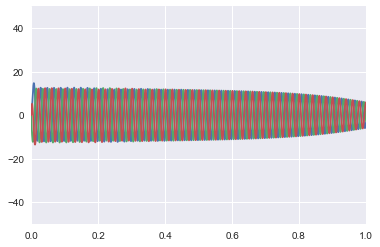

In [564]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import quad
from scipy.integrate import trapz
%matplotlib inline


Vm = 100*1.414/1.732    #Phase peak voltage                 
freq = 50
w=2*np.pi *freq    
J = 0.0168        #moment of inertia
T_l = 0          #load torque
B= 0.006          #coefficient of friction 
P=4               #no of poles
Rs=2.177 #stator resistance
Rr=1.433 #rotor resistance
Lm=0.163 #mutual inductance
Lls=.00917 #stator leakage inductance
Llr=.00917 #rootor leakage inductance
Ls=Lm + Lls   #stator inductance
Lr=Lm + Llr   # rotor inductance

R=([Rs,0,0,0],[0,Rs,0,0],[0,0,Rr,0],[0,0,0,Rr])      
L=([Ls,0,Lm,0],[0,Ls,0,Lm],[Lm,0,Lr,0],[0,Lm,0,Lr])
G=([0,0,0,0],[0,0,0,0],[0,Lm,0,Lr],[-Lm,0,-Lr,0])

invL=np.linalg.inv(L)
vdq0=np.zeros((2,1))
vdq01=np.zeros((2,1))
vdq02=np.zeros((2,1))
vdq03=np.zeros((2,1))

v0=np.zeros((4,1))
v1=np.zeros((4,1))
v2=np.zeros((4,1))
v3=np.zeros((4,1))
i=np.zeros((4,1))
k1=np.zeros((4,1))
k2=np.zeros((4,1))
k3=np.zeros((4,1))
k4=np.zeros((4,1))
i_abc=np.zeros((3,1))

k=0
wr=[] 
Te=[]
h=.0001
n=200/freq
step = int(n/h)
t=[]
ias=[]
ibs=[]
ics=[]
for k in range(0,step+1 ,1):
    r = 0
    t.append(r)
    wr.append(r)
    Te.append(r)
    ias.append(r)
    ibs.append(r)
    ics.append(r)
for k in range(0,step ,1):  
   
    vdq0 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*t[k])] ,[np.sin(w*t[k] -(2./3)*np.pi)] ,[np.sin(w*t[k] + (2./3)*np.pi)]))
    vdq1 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h/2))] ,[np.sin(w*(t[k]+h/2) -(2./3)*np.pi )] ,[np.sin(w*(t[k]+h/2) + (2./3)*np.pi)]))
    vdq2 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h/2))] ,[np.sin(w*(t[k]+h/2) -(2./3)*np.pi )] ,[np.sin(w*(t[k]+h/2) + (2./3)*np.pi)]))
    vdq3 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h))] ,[np.sin(w*(t[k]+h) -(2./3)*np.pi )] ,[np.sin(w*(t[k]+h) + (2./3)*np.pi)]))
    
    v0[0] = vdq0[0]
    v0[1] = vdq0[1]
    v1[0] = vdq1[0]
    v1[1] = vdq1[1]
    v2[0] = vdq2[0]
    v2[1] = vdq2[1]
    v3[0] = vdq3[0]
    v3[1] = vdq3[1]
         
    k1=np.dot(invL ,(v0-(np.dot(R,i) + wr[k]*np.dot(G,i))))
    k2=np.dot(invL ,((v1+ (h/2)*k1)- (np.dot(R,(i+(h/2)*k1)) + wr[k]*np.dot(G,(i+ (h/2)*k1)))))
    k3=np.dot(invL ,((v2+ (h/2)*k2)- (np.dot(R,(i+(h/2)*k2)) + wr[k]*np.dot(G,(i+ (h/2)*k2)))))                                                                                   
    k4=np.dot(invL ,((v3+ h*k3)-(np.dot(R,(i+ h*k3))+ wr[k]*np.dot(G,(i+ h*k3)))))
    
    i= i + (h/6)*(k1+2*k2+2*k3+k4)
    ias[k+1]=i[0]
    ibs[k+1]=(-.5)*i[0]+(.866)*i[1]
    ics[k+1]=(-.5)*i[0]-(.866)*i[1]
    Te[k+1] = (3*Lm*((i[2] * i[1]) -(i[3] *i[0])))
    wr[k+1] = (Te[k] - T_l )*P*h/(2*J) + (1-(B*h/J))*wr[k] 
    t[k+1] = t[k] + h
   
plt.plot(t,Te)
plt.show()
plt.plot(t,wr)
plt.show()
plt.plot(t,ias)
plt.plot(t,ibs)
plt.plot(t,ics)
plt.axis([0,1,-50,50])


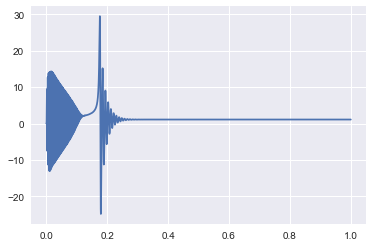

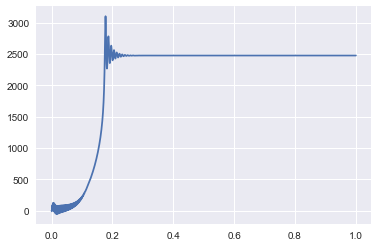

[0.65, 0.7, -40, 40]

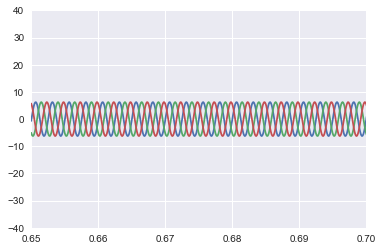

In [565]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import quad
from scipy.integrate import trapz
# import seaborn as sns
%matplotlib inline


Vm = 105*1.414    #Phase peak voltage                 
freq = 400
w=2*np.pi *freq    
J = 0.0001675        #moment of inertia
T_l = 1.1          #load torque
B= 0#0.00006          #coefficient of friction 
P=4               #no of poles
Rs=.047 #stator resistance
Rr=.05 #rotor resistance
Lm=8.71/w #mutual inductance
Lls=.433/w #stator leakage inductance
Llr=.623/w #rotor leakage inductance
Ls=Lm + Lls   #stator inductance
Lr=Lm + Llr   # rotor inductance

R=([Rs,0,0,0],[0,Rs,0,0],[0,0,Rr,0],[0,0,0,Rr])      
L=([Ls,0,Lm,0],[0,Ls,0,Lm],[Lm,0,Lr,0],[0,Lm,0,Lr])
G=([0,0,0,0],[0,0,0,0],[0,Lm,0,Lr],[-Lm,0,-Lr,0])

invL=np.linalg.inv(L)
vdq0=np.zeros((2,1))
vdq01=np.zeros((2,1))
vdq02=np.zeros((2,1))
vdq03=np.zeros((2,1))

v0=np.zeros((4,1))
v1=np.zeros((4,1))
v2=np.zeros((4,1))
v3=np.zeros((4,1))
i=np.zeros((4,1))
k1=np.zeros((4,1))
k2=np.zeros((4,1))
k3=np.zeros((4,1))
k4=np.zeros((4,1))
i_abc=np.zeros((3,1))

k=0
wr=[] 
Te=[]
h=.0001
n=400/freq
step = int(n/h)
t=[]
ias=[]
ibs=[]
ics=[]
for k in range(0,step+1 ,1):
    r = 0
    t.append(r)
    wr.append(r)
    Te.append(r)
    ias.append(r)
    ibs.append(r)
    ics.append(r)
for k in range(0,step ,1):  
   
    vdq0 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*t[k])] ,[np.sin(w*t[k] -(2./3)*np.pi)] ,[np.sin(w*t[k] + (2./3)*np.pi)]))
    vdq1 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h/2))] ,[np.sin(w*(t[k]+h/2) -(2./3)*np.pi )] ,[np.sin(w*(t[k]+h/2) + (2./3)*np.pi)]))
    vdq2 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h/2))] ,[np.sin(w*(t[k]+h/2) -(2./3)*np.pi )] ,[np.sin(w*(t[k]+h/2) + (2./3)*np.pi)]))
    vdq3 = ((2./3)*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h))] ,[np.sin(w*(t[k]+h) -(2./3)*np.pi )] ,[np.sin(w*(t[k]+h) + (2./3)*np.pi)]))
    
    v0[0] = vdq0[0]
    v0[1] = vdq0[1]
    v1[0] = vdq1[0]
    v1[1] = vdq1[1]
    v2[0] = vdq2[0]
    v2[1] = vdq2[1]
    v3[0] = vdq3[0]
    v3[1] = vdq3[1]
         
    k1=np.dot(invL ,(v0-(np.dot(R,i) + wr[k]*np.dot(G,i))))
    k2=np.dot(invL ,((v1+ (h/2)*k1)- (np.dot(R,(i+(h/2)*k1)) + wr[k]*np.dot(G,(i+ (h/2)*k1)))))
    k3=np.dot(invL ,((v2+ (h/2)*k2)- (np.dot(R,(i+(h/2)*k2)) + wr[k]*np.dot(G,(i+ (h/2)*k2)))))                                                                                   
    k4=np.dot(invL ,((v3+ h*k3)-(np.dot(R,(i+ h*k3))+ wr[k]*np.dot(G,(i+ h*k3)))))
    
    i= i + (h/6)*(k1+2*k2+2*k3+k4)
    ias[k+1]=i[0]
    ibs[k+1]=(-.5)*i[0]+(.866)*i[1]
    ics[k+1]=(-.5)*i[0]-(.866)*i[1]
    Te[k+1] = (3*Lm*((i[2] * i[1]) -(i[3] *i[0])))
    wr[k+1] = (Te[k] - T_l )*P*h/(2*J) + (1-(B*h/J))*wr[k] 
    t[k+1] = t[k] + h
   
plt.plot(t,Te)
plt.show()
plt.plot(t,wr)
plt.show()
plt.plot(t,ias)
plt.plot(t,ibs)
plt.plot(t,ics)
plt.axis([0.65,.7,-40,40])
